In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.20']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
969,Afghanistan,22.10.20,201750
1950,Africa,22.10.20,12372665
2919,Albania,22.10.20,332719
3888,Algeria,22.10.20,270769
4851,Andorra,22.10.20,46449
...,...,...,...
225162,Wallis and Futuna,22.10.20,761
226166,World,22.10.20,626794437
227090,Yemen,22.10.20,11939
228037,Zambia,22.10.20,333644


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
969,Afghanistan,22.10.20,201750
2919,Albania,22.10.20,332719
3888,Algeria,22.10.20,270769
4851,Andorra,22.10.20,46449
5796,Angola,22.10.20,103131
...,...,...,...
223490,Vietnam,22.10.20,11495772
225162,Wallis and Futuna,22.10.20,761
227090,Yemen,22.10.20,11939
228037,Zambia,22.10.20,333644


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
216145,United States,22.10.20,97150292
94328,India,22.10.20,44638636
72723,France,22.10.20,36537787
77540,Germany,22.10.20,35098062
28912,Brazil,22.10.20,34771320
191869,South Korea,22.10.20,25244255
215142,United Kingdom,22.10.20,23855526
102101,Italy,22.10.20,23254633
104058,Japan,22.10.20,21923635
169920,Russia,22.10.20,21041184


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
209212,Turkey,22.10.20,16919638
193791,Spain,22.10.20,13462593
155650,Oceania,22.10.20,12544263
223490,Vietnam,22.10.20,11495772
12654,Australia,22.10.20,10341058
...,...,...,...
225162,Wallis and Futuna,22.10.20,761
96278,International,22.10.20,721
221537,Vatican,22.10.20,29
211245,Tuvalu,22.10.20,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.20', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_19448\634182816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.20', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.20,97150292
India,22.10.20,44638636
France,22.10.20,36537787
Germany,22.10.20,35098062
Brazil,22.10.20,34771320
South Korea,22.10.20,25244255
United Kingdom,22.10.20,23855526
Italy,22.10.20,23254633
Japan,22.10.20,21923635


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.20,97150292
1,India,22.10.20,44638636
2,France,22.10.20,36537787
3,Germany,22.10.20,35098062
4,Brazil,22.10.20,34771320
5,South Korea,22.10.20,25244255
6,United Kingdom,22.10.20,23855526
7,Italy,22.10.20,23254633
8,Japan,22.10.20,21923635
9,Russia,22.10.20,21041184


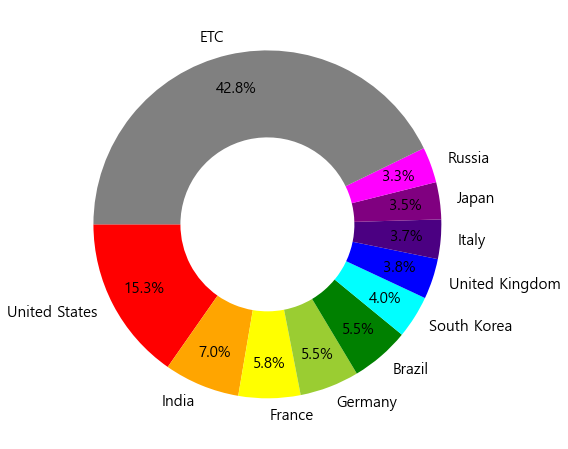

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()